In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested
from phe import *
from phe import map_data as phe_map_data, latest_changes
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
1,877 cases (7 day average) as of Sun 09 May, +102.1 since Sat 08 May
82 hospitalised (7 day average) as of Tue 11 May, +0.0 since Tue 11 May
7 died (7 day average) as of Sun 09 May, -0.1 since Sat 08 May


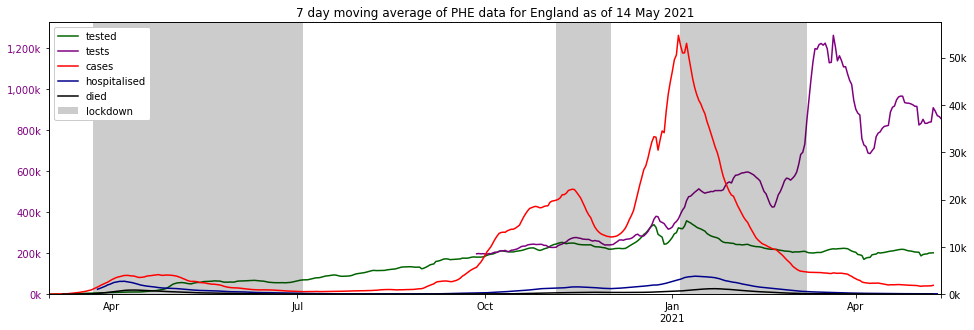

In [3]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

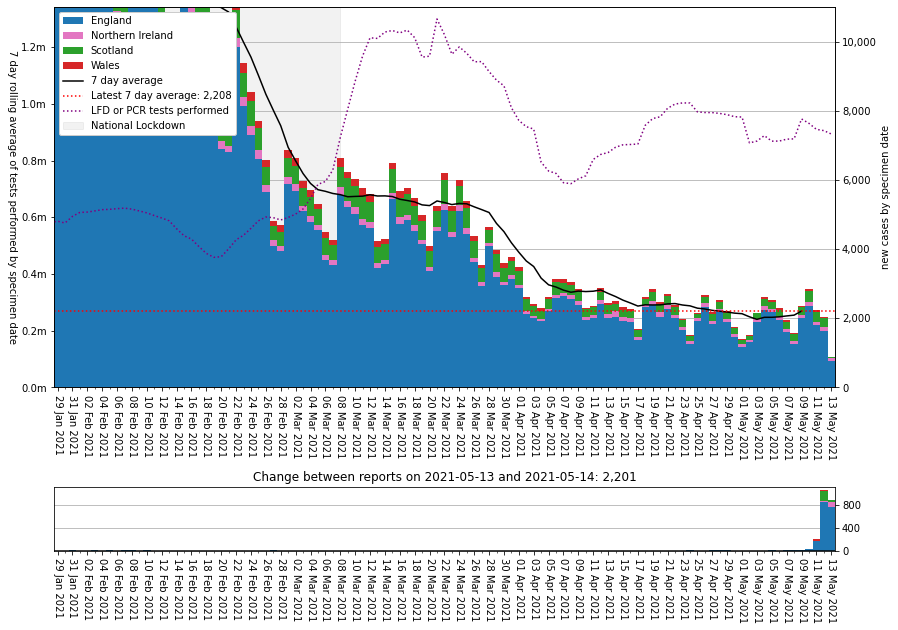

In [4]:
plot_areas(for_date, 'cases_nations', ylim=11_000, earliest='2021-01-29')

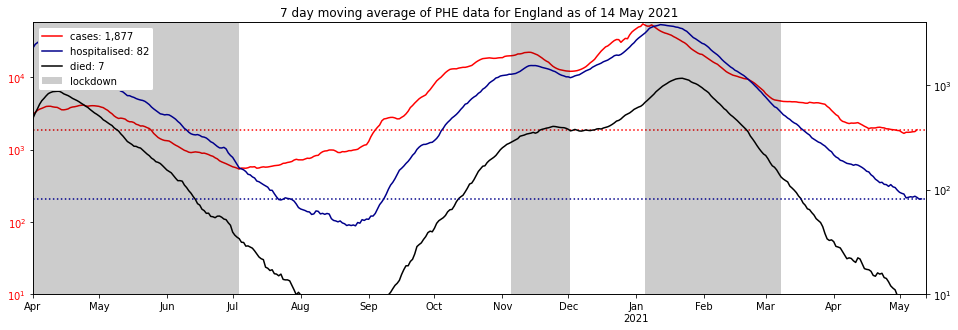

In [5]:
plot_summary(earliest_date='2020-04-01', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

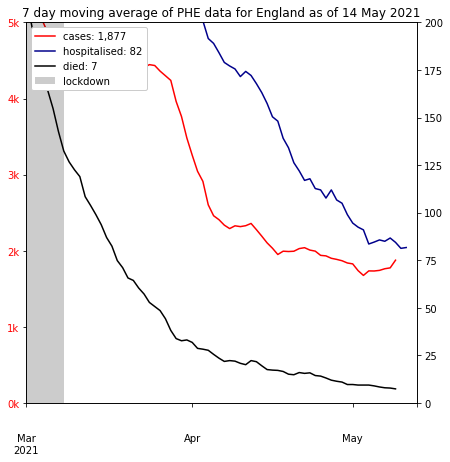

In [6]:
plot_summary(earliest_date='2021-03-01', show_latest=True, figsize=(7, 7),
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=5_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=200)

In [7]:
vaccination_changes()

,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
England,13 May 21,"+16,314,333","+30,146,933","+16,314,333","+378,650","+173,820","+378,650"
Northern Ireland,13 May 21,"+537,343","+992,682","+537,343","+11,152","+3,113","+11,152"
Scotland,13 May 21,"+1,575,765","+2,985,557","+1,575,765","+24,426","+17,388","+24,426"
Wales,13 May 21,"+891,569","+1,990,783","+891,569","+13,813","+14,963","+13,813"


,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,16314333.0,30146933.0,13832600.0,56286961,28.984214,24.575141,46.440645
1,Northern Ireland,N92000002,537343.0,992682.0,455339.0,1893667,28.375792,24.045357,47.578851
2,Scotland,S92000003,1575765.0,2985557.0,1409792.0,5463300,28.842732,25.804770,45.352498
3,Wales,W92000004,891569.0,1990783.0,1099214.0,3152879,28.277933,34.863818,36.858249


'partial: 36,115,955 (54.1%), full: 19,319,010'

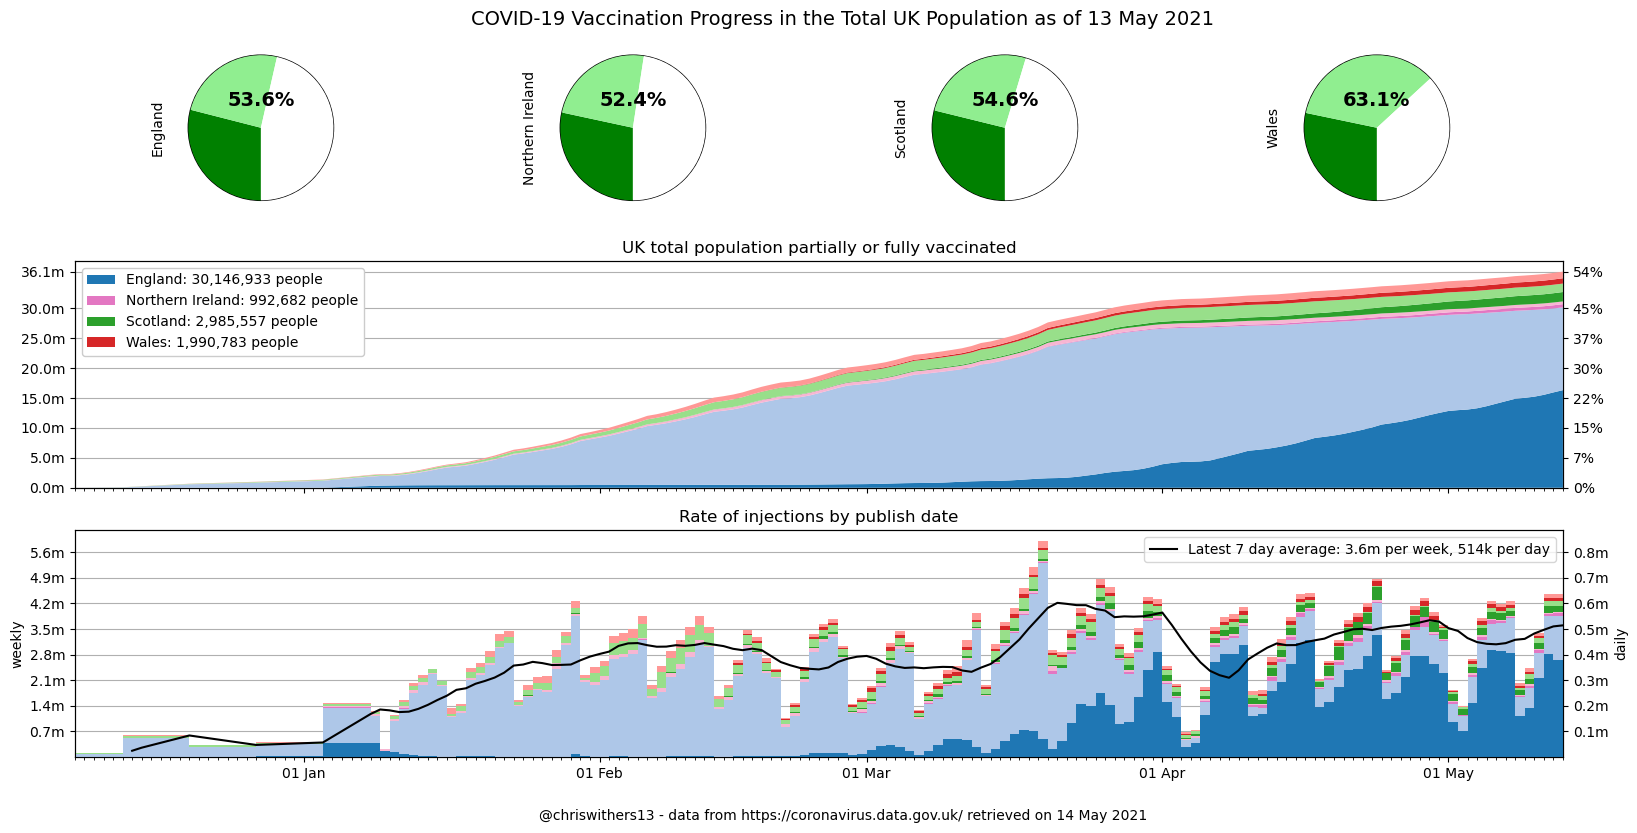

In [8]:
results = vaccination_dashboard(show_partial=True)
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

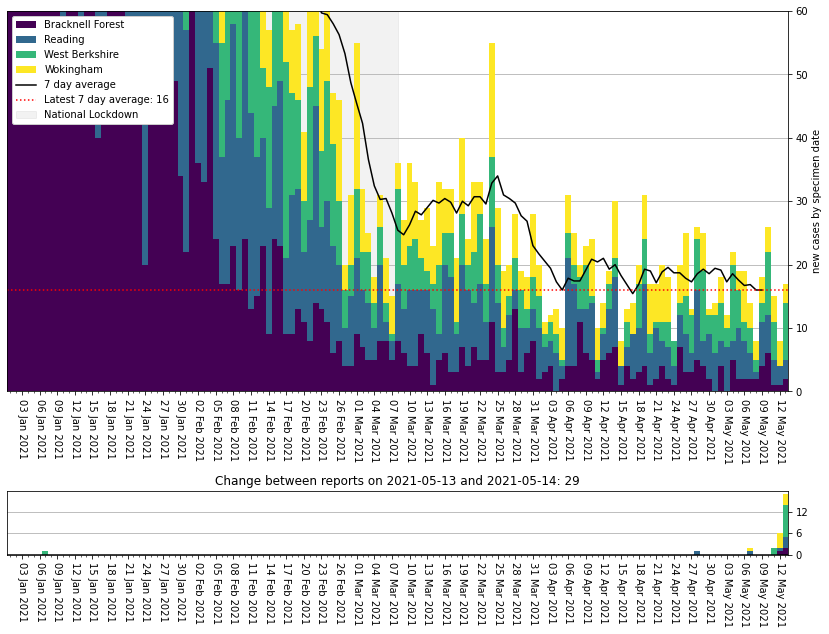

In [9]:
plot_areas(for_date, areas=my_areas, earliest='2021-01-01', ylim=60)

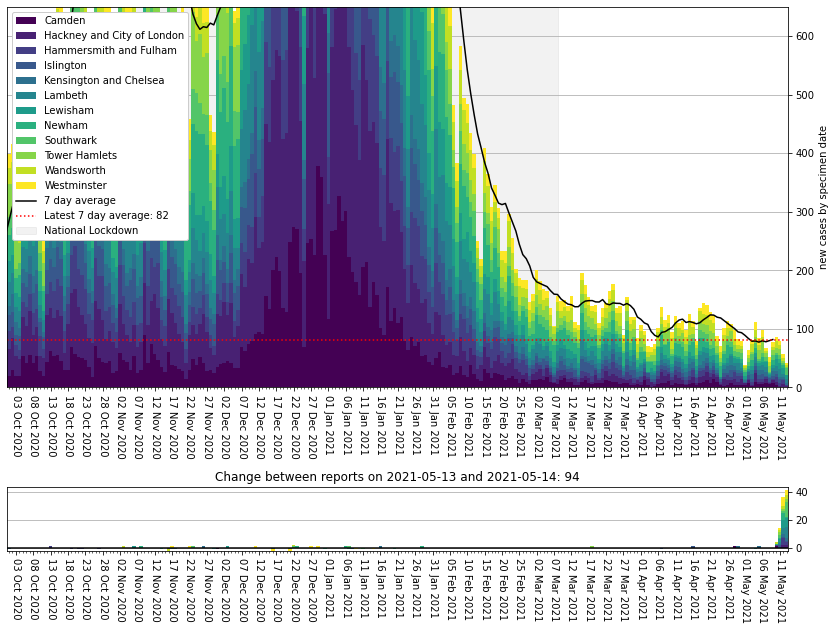

In [10]:
plot_areas(for_date, areas=london_areas, ylim=650)

In [11]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000001,Bolton,255.259955,734.0,2021-05-13
N09000005,Derry City and Strabane,107.744375,163.0,2021-05-13
E06000055,Bedford,106.756226,185.0,2021-05-13
E06000008,Blackburn with Darwen,102.207140,153.0,2021-05-13
S12000049,Glasgow City,79.131918,501.0,2021-05-13
S12000011,East Renfrewshire,61.760703,59.0,2021-05-13
E08000034,Kirklees,61.620739,271.0,2021-05-13
E07000036,Erewash,61.540595,71.0,2021-05-13
E09000018,Hounslow,55.612232,151.0,2021-05-13


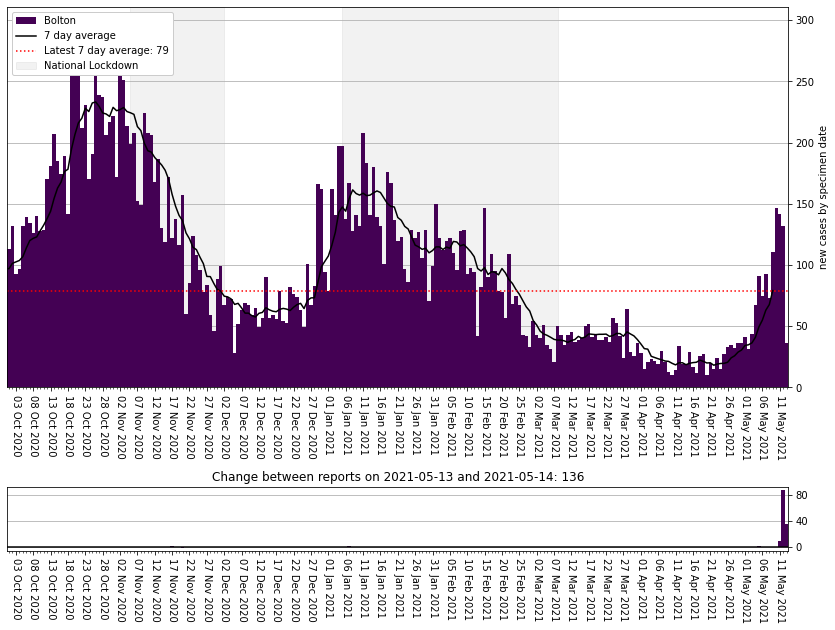

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000001,Bolton,255.259955,734.0,2021-05-13
S12000049,Glasgow City,79.131918,501.0,2021-05-13
E08000035,Leeds,42.363318,336.0,2021-05-13
E08000034,Kirklees,61.620739,271.0,2021-05-13
E08000019,Sheffield,44.455615,260.0,2021-05-13
E08000003,Manchester,38.888829,215.0,2021-05-13
E08000032,Bradford,35.940835,194.0,2021-05-13
E06000055,Bedford,106.756226,185.0,2021-05-13
E08000025,Birmingham,14.625824,167.0,2021-05-13


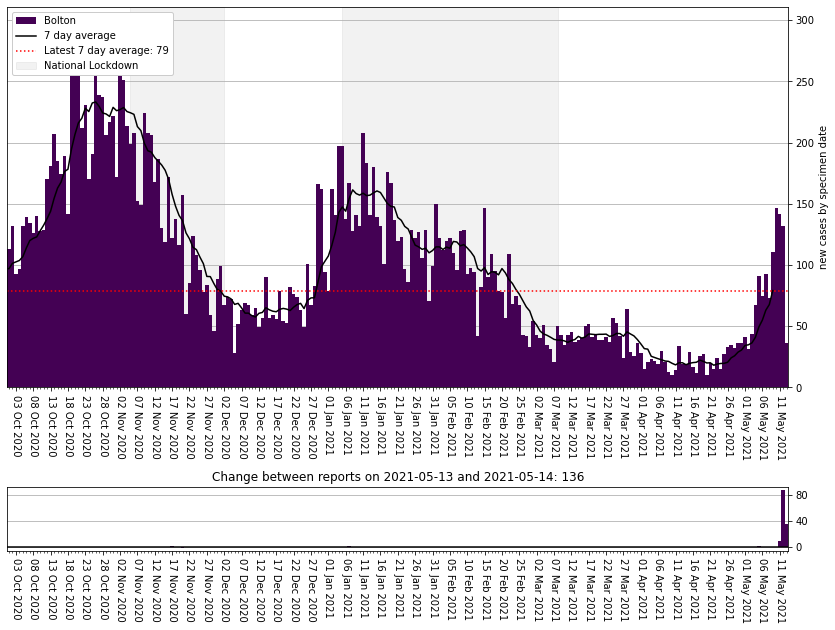

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [16]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 0.6
phe_max = 0.24

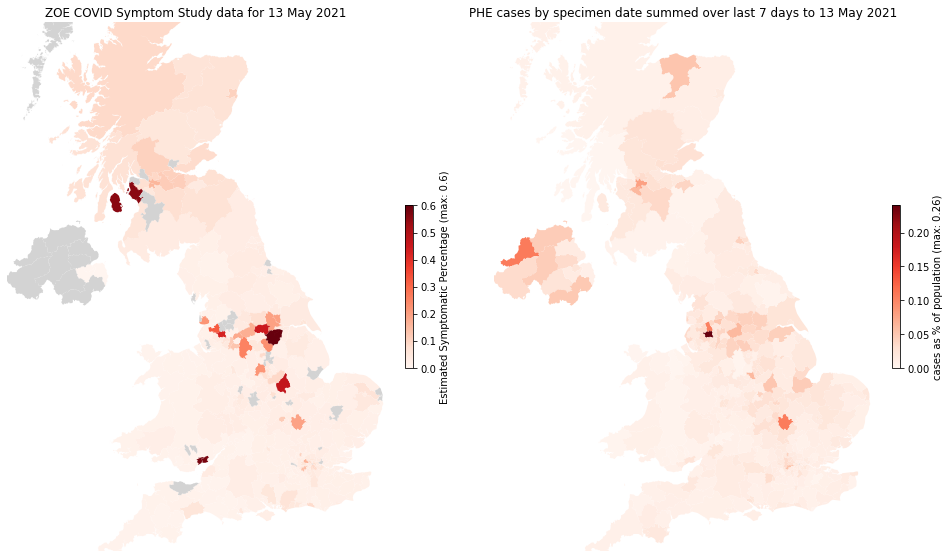

In [17]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [18]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...